#### Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error

#### Creating dataset

In [9]:
# Set a random seed for reproducibility
np.random.seed(0)

# Constants for the quadratic equation
a,b,c = 1,2,3

# Create a DataFrame with a single feature
n = 500  # number of samples
x = np.linspace(-10, 10, n)  # feature values from -10 to 10
noise = np.random.normal(0, 10, n)  # some random noise
y = a * x**2 + b * x + c + noise  # quadratic equation with noise

data = pd.DataFrame({'X': x, 'y': y})

# round the values to 3 decimal places
data["X"] = data["X"].round(3)
data["y"] = data["y"].round(3)

data.shape

(500, 2)

In [10]:
data.head()

,X,y
0,-10.00,100.641
1,-9.96,86.282
2,-9.92,91.351
3,-9.88,103.259
4,-9.84,98.816


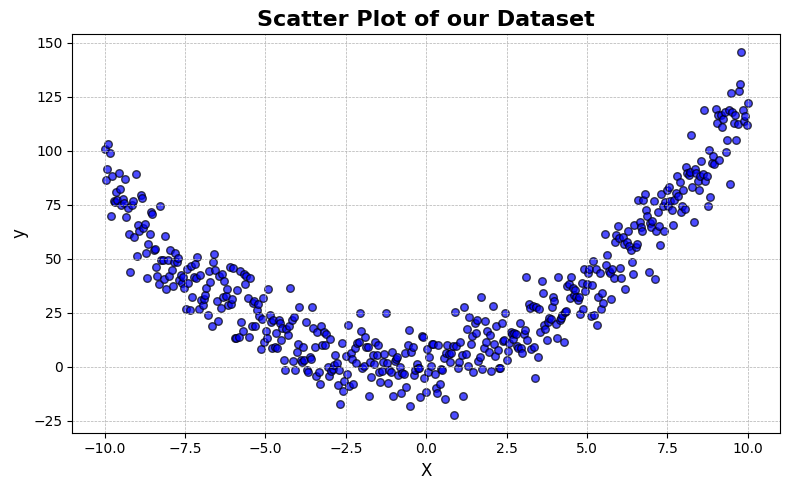

In [7]:
fig, ax = plt.subplots(figsize=(8, 5)) 

ax.scatter(x=data["X"], y=data["y"], color='blue', marker='o', edgecolor='black', s=30, alpha=0.7)  

ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_title('Scatter Plot of our Dataset', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('y', fontsize=12)

plt.tight_layout()
plt.show()

#### Train-Test Split
We are going to do a 80-20 train-test split which means 80% of our data will be used for training and the rest 20% will be kept aside for testing.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data[["X"]], data["y"], test_size=0.2, random_state=0)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(f"Shape of Training DF: {train_df.shape}")
print(f"Shape of Test DF: {test_df.shape}")

Shape of Training DF: (400, 2)
Shape of Test DF: (100, 2)


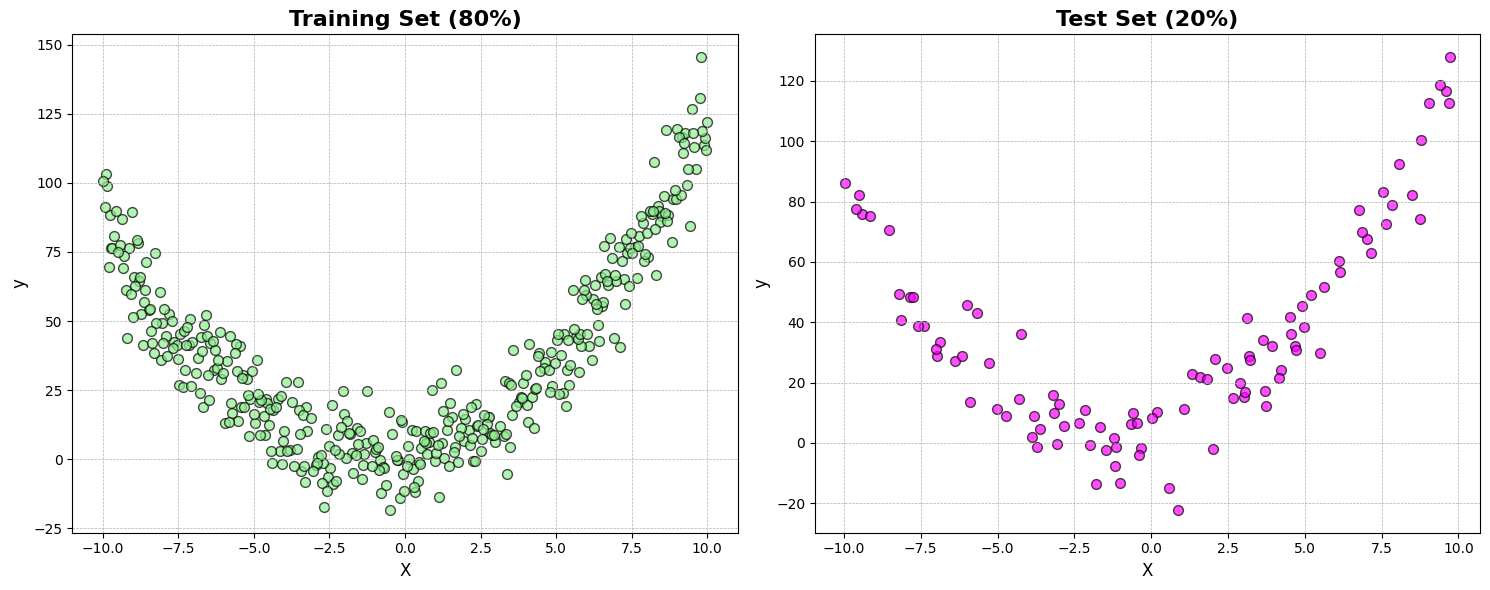

In [32]:
# Plotting train and test sets

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6)) 

ax1.scatter(train_df["X"], train_df["y"], color='lightgreen', marker='o', edgecolor='black', s=50, alpha=0.7)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.set_title('Training Set (80%)', fontsize=16, fontweight='bold')
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('y', fontsize=12)

# Plotting the testing data on ax2
ax2.scatter(test_df["X"], test_df["y"], color='magenta', marker='o', edgecolor='black', s=50, alpha=0.7)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.set_title('Test Set (20%)', fontsize=16, fontweight='bold')
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('y', fontsize=12)

plt.tight_layout()
plt.show()

#### Fitting the decision tree on training dataset

We are going with the default values of the hyperparameters. One of the main hyperparameter in a decision tree is max_depth, unless specified, it is set to None, which means the tree will be grown to its full potential.

In [15]:
# Fit the regression tree
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

#### Evaluating the decision tree

In [19]:
# Predict for training data and compute mean squared error
train_yhat = regressor.predict(X_train)
train_mse = mean_squared_error(y_train, train_yhat)

# Predict for test data and compute mean squared error
test_yhat = regressor.predict(X_test)
test_mse = mean_squared_error(y_test, test_yhat)

print(f"MSE on training set: {np.round(train_mse, 3)}")
print(f"MSE on test set: {np.round(test_mse, 3)}")

MSE on training set: 0.0
MSE on test set: 173.336


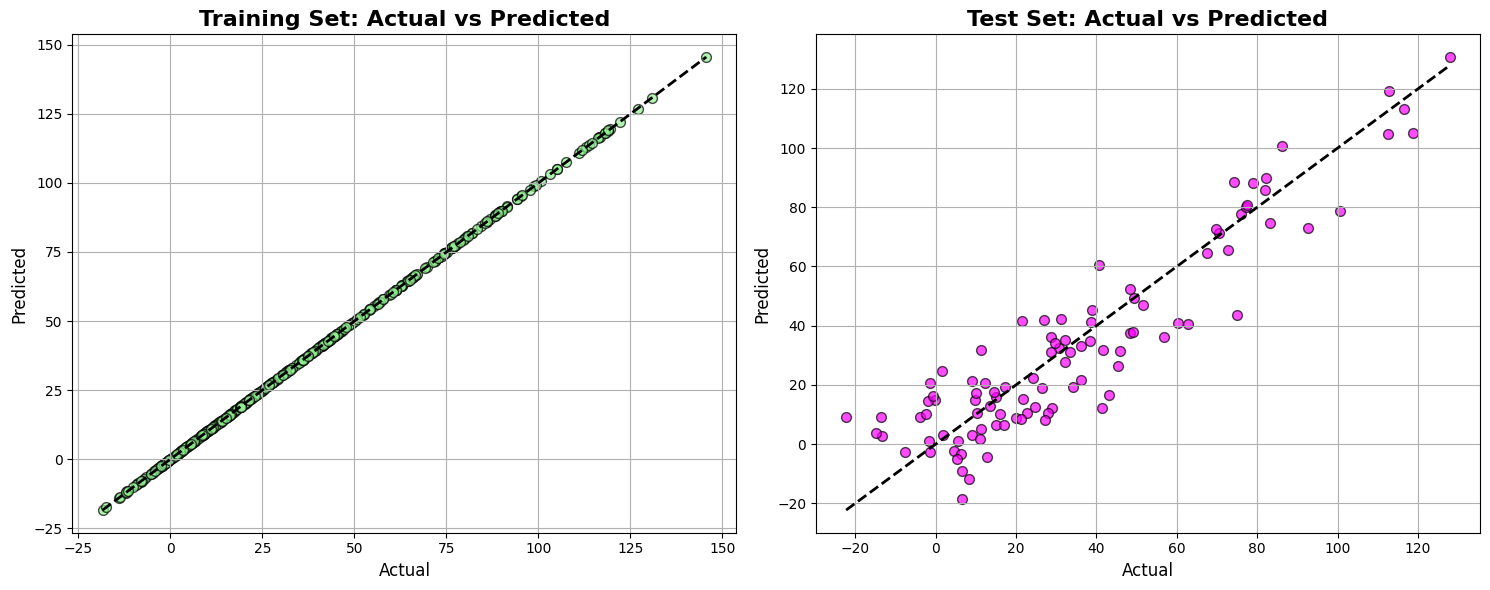

In [35]:
# Plotting the predictions
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting actual vs predicted for training set on ax1
ax1.scatter(y_train, train_yhat, color='lightgreen', marker='o', edgecolor='black', s=50, alpha=0.7)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Adding a line for perfect predictions
ax1.set_title('Training Set: Actual vs Predicted', fontsize=16, fontweight='bold')
ax1.set_xlabel('Actual', fontsize=12)
ax1.set_ylabel('Predicted', fontsize=12)
ax1.grid(True)

# Plotting actual vs predicted for testing set on ax2
ax2.scatter(y_test, test_yhat, color='magenta', marker='o', edgecolor='black', s=50, alpha=0.7)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Adding a line for perfect predictions
ax2.set_title('Test Set: Actual vs Predicted', fontsize=16, fontweight='bold')
ax2.set_xlabel('Actual', fontsize=12)
ax2.set_ylabel('Predicted', fontsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()

#### What we could've done differently?
The least we can do to prevent the situation like above is to set the max_depth to stop the tree from over-growing. There is not an universal set of the magical hyperparameter values. That's why we need to use hyperparameter tuning and cross validation to find what's best for us with the given data and use case.

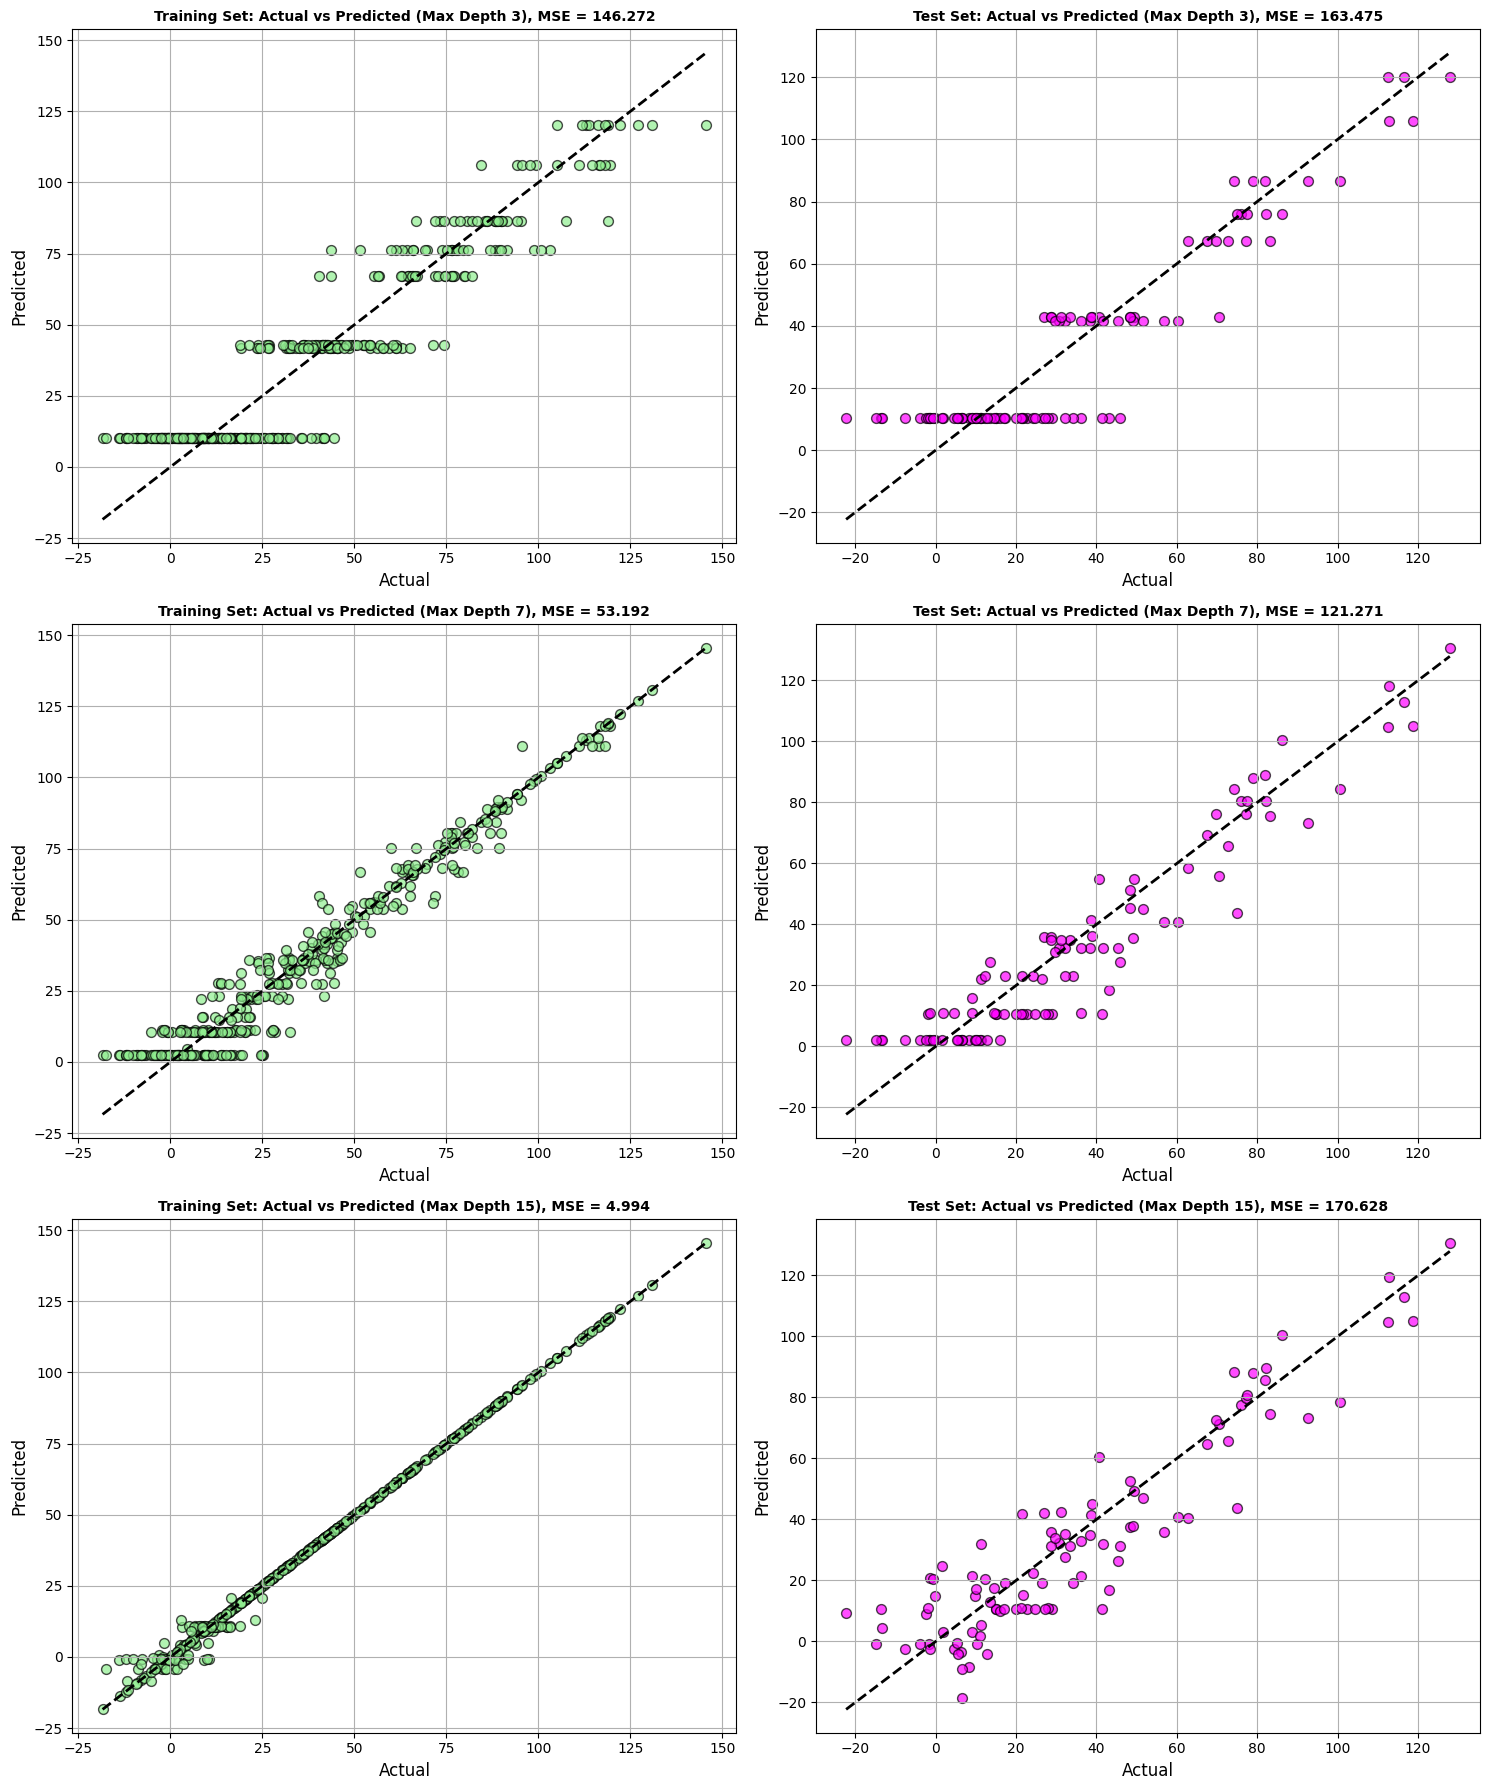

In [51]:
max_depth_vals = [3, 7, 15]

# Creating a figure with subplots for each max_depth value
fig, axs = plt.subplots(nrows=len(max_depth_vals), ncols=2, figsize=(15, 6 * len(max_depth_vals)))

for i, max_depth in enumerate(max_depth_vals):
    # Fit the regression tree for each max_depth value
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(X_train, y_train)

    # Predict for training data and compute mean squared error
    train_yhat = regressor.predict(X_train)
    train_mse = mean_squared_error(y_train, train_yhat)

    # Predict for test data and compute mean squared error
    test_yhat = regressor.predict(X_test)
    test_mse = mean_squared_error(y_test, test_yhat)

    # print(f"Max Depth: {max_depth}, MSE on training set: {np.round(train_mse, 3)}, MSE on test set: {np.round(test_mse, 3)}")

    # Plotting actual vs predicted for training set
    axs[i, 0].scatter(y_train, train_yhat, color='lightgreen', marker='o', edgecolor='black', s=50, alpha=0.7)
    axs[i, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Line for perfect predictions
    axs[i, 0].set_title(f'Training Set: Actual vs Predicted (Max Depth {max_depth}), MSE = {np.round(train_mse, 3)}', fontsize=10, fontweight='bold')
    axs[i, 0].set_xlabel('Actual', fontsize=12)
    axs[i, 0].set_ylabel('Predicted', fontsize=12)
    axs[i, 0].grid(True)

    # Plotting actual vs predicted for testing set
    axs[i, 1].scatter(y_test, test_yhat, color='magenta', marker='o', edgecolor='black', s=50, alpha=0.7)
    axs[i, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect predictions
    axs[i, 1].set_title(f'Test Set: Actual vs Predicted (Max Depth {max_depth}), MSE = {np.round(test_mse, 3)}', fontsize=10, fontweight='bold')
    axs[i, 1].set_xlabel('Actual', fontsize=12)
    axs[i, 1].set_ylabel('Predicted', fontsize=12)
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()

In [67]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(
    DecisionTreeRegressor(), n_estimators=200,
    max_samples=100, bootstrap=True, n_jobs=-1
)

bag_regressor.fit(X_train, y_train)


BaggingRegressor(estimator=DecisionTreeRegressor(), max_samples=100,
                 n_estimators=200, n_jobs=-1)

In [71]:
# Predict for training data and compute mean squared error
bag_train_yhat = bag_regressor.predict(X_train)
bag_train_mse = mean_squared_error(y_train, bag_train_yhat)

# Predict for test data and compute mean squared error
bag_test_yhat = bag_regressor.predict(X_test)
bag_test_mse = mean_squared_error(y_test, bag_test_yhat)

print(f"MSE on training set after bagging: {np.round(bag_train_mse, 3)}")
print(f"MSE on test set after bagging: {np.round(bag_test_mse, 3)}")

MSE on training set after bagging: 69.438
MSE on test set after bagging: 101.521


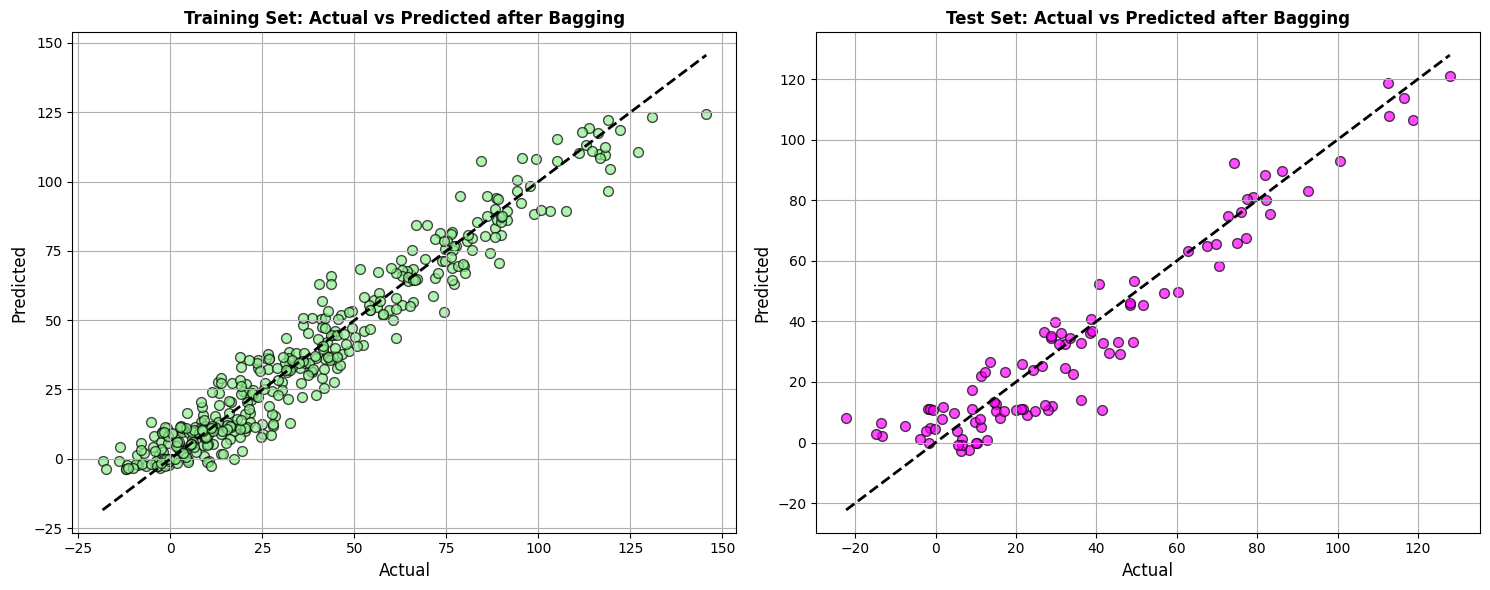

In [70]:
# Plotting the predictions
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting actual vs predicted for training set on ax1
ax1.scatter(y_train, bag_train_yhat, color='lightgreen', marker='o', edgecolor='black', s=50, alpha=0.7)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Adding a line for perfect predictions
ax1.set_title('Training Set: Actual vs Predicted after Bagging', fontsize=12, fontweight='bold')
ax1.set_xlabel('Actual', fontsize=12)
ax1.set_ylabel('Predicted', fontsize=12)
ax1.grid(True)

# Plotting actual vs predicted for testing set on ax2
ax2.scatter(y_test, bag_test_yhat, color='magenta', marker='o', edgecolor='black', s=50, alpha=0.7)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Adding a line for perfect predictions
ax2.set_title('Test Set: Actual vs Predicted after Bagging', fontsize=12, fontweight='bold')
ax2.set_xlabel('Actual', fontsize=12)
ax2.set_ylabel('Predicted', fontsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()